In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import metrics
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [9]:
df = pd.read_csv("Hotel Reservations.csv")

In [10]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.shape

(36275, 19)

In [6]:
# checking for duplicate data, if any
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
# checking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
# summary of dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<AxesSubplot:>

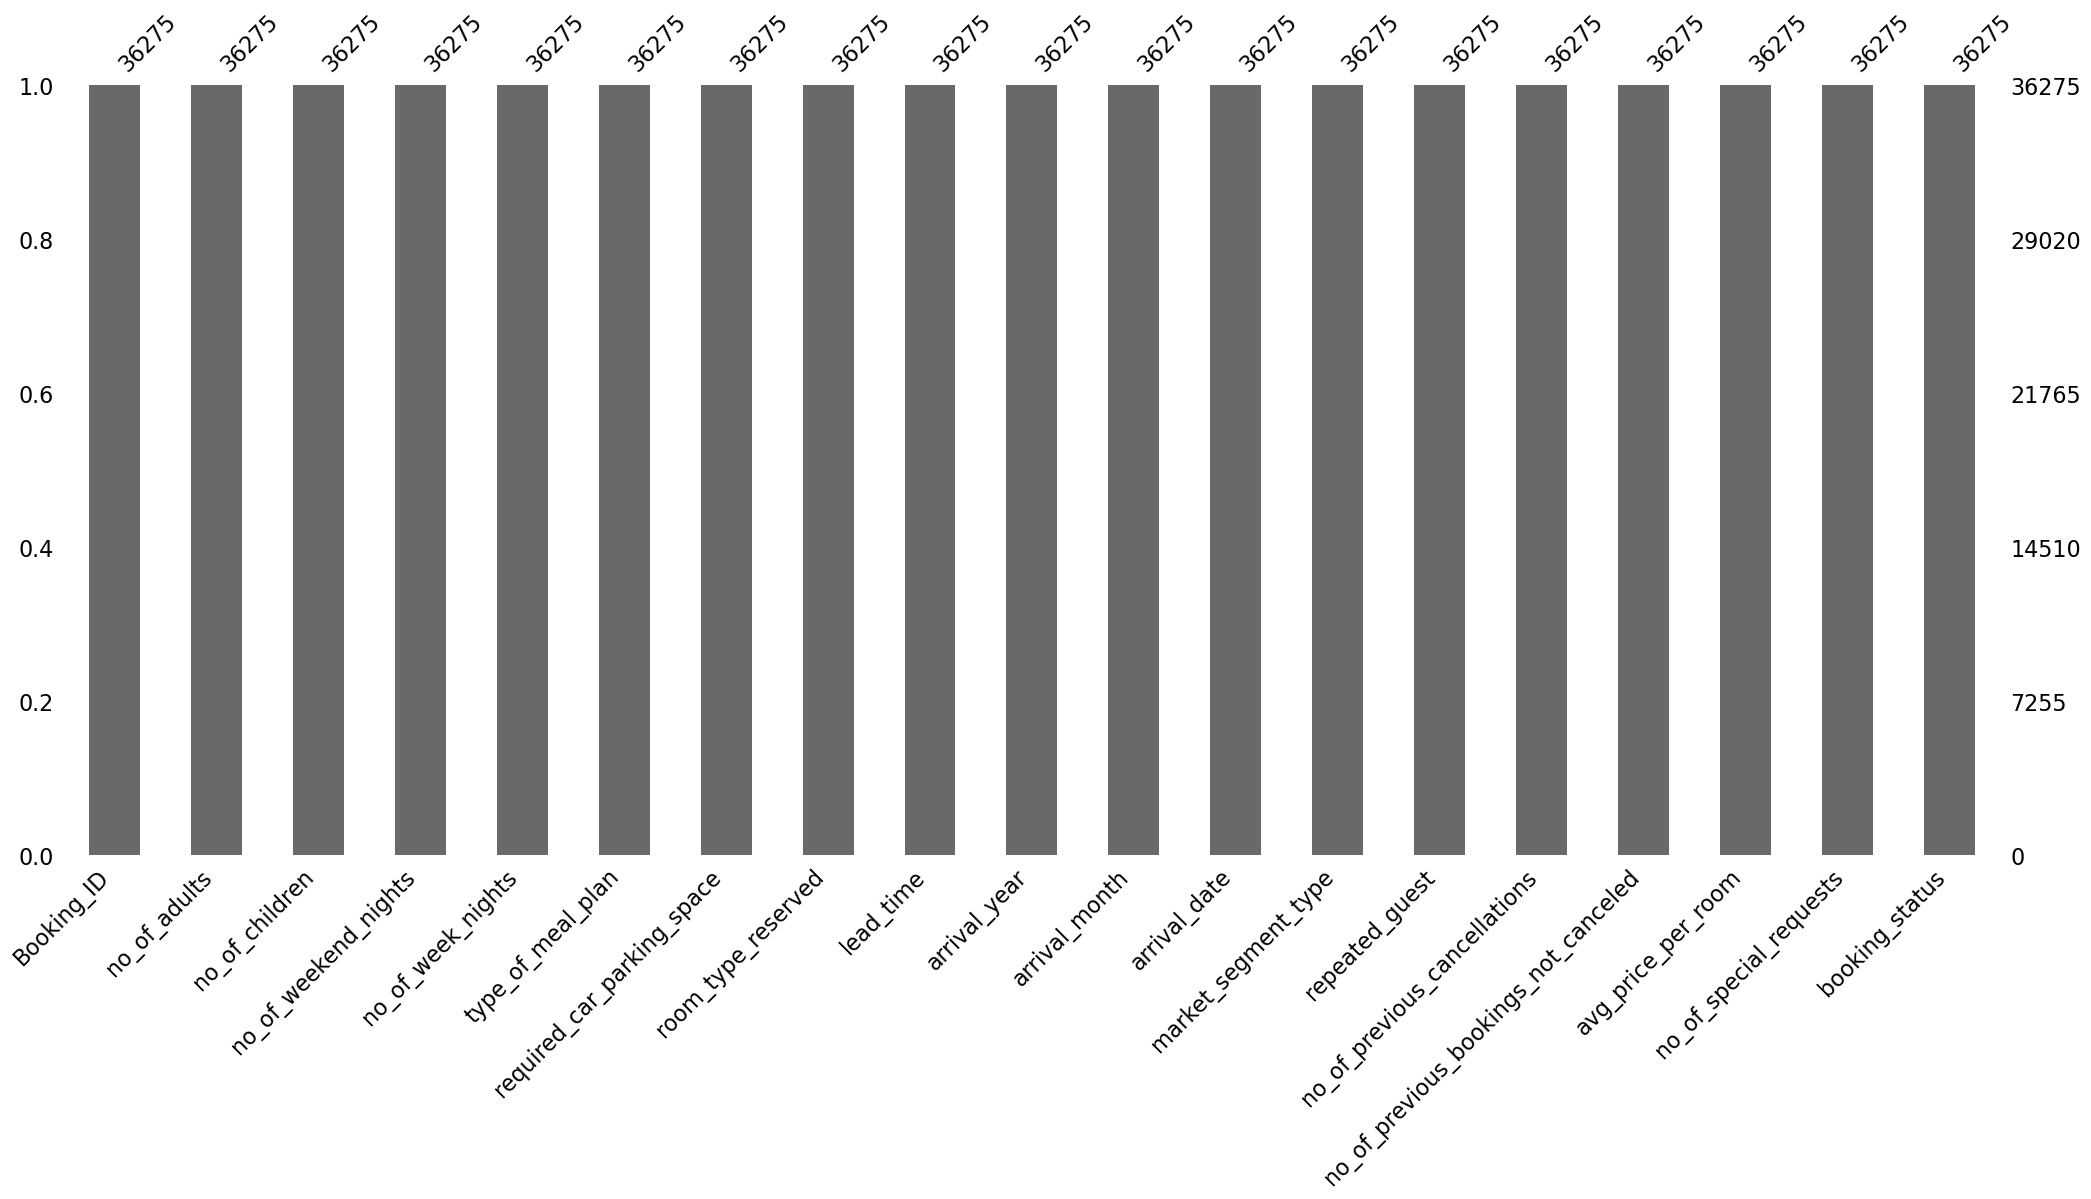

In [10]:
msno.bar(df)

In [11]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]] = \
df[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]]\
.astype("category")
df.describe(include="object").T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [13]:
df[["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]] = \
df[["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]].astype("category")
cat_columns = df.describe(include="category").columns
cat_columns


Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'booking_status'],
      dtype='object')

In [14]:
for i in cat_columns:
    print("unique values in", i, "are:")
    print(df[i].value_counts())
    print("*"*50)

unique values in type_of_meal_plan are:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
unique values in required_car_parking_space are:
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
**************************************************
unique values in room_type_reserved are:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
unique values in arrival_year are:
2018    29761
2017     6514
Name: arrival_year, dtype: int64
**************************************************
unique values in arrival_month are:
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, 

# BOOKING STATUS COUNTS

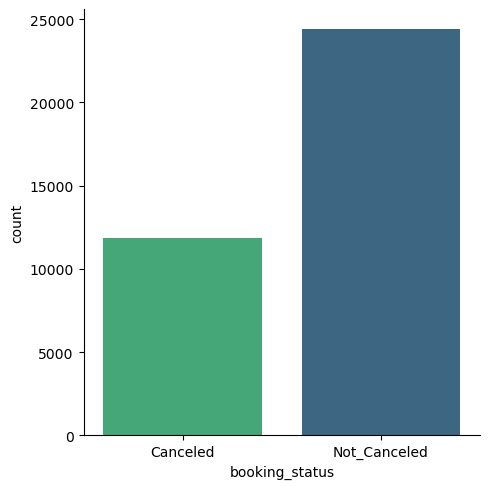

In [15]:
sns.catplot(data=df, x="booking_status", kind="count",height=5 , palette="viridis_r")

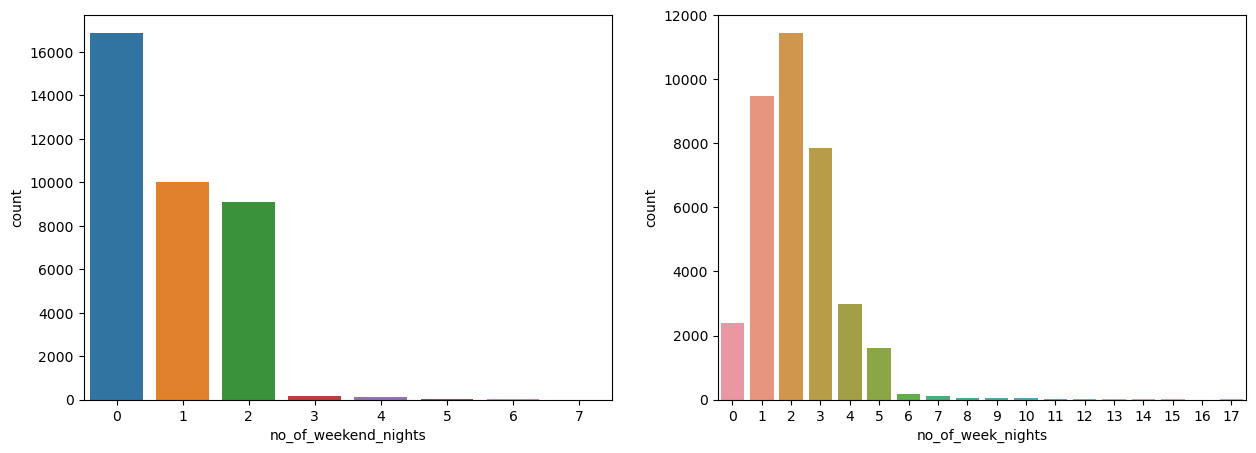

In [16]:
# univariate, no_of_weekend_nights, no_of_week_nights

fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="no_of_weekend_nights", ax=ax[0]);
sns.countplot(data=df, x="no_of_week_nights", ax=ax[1]);

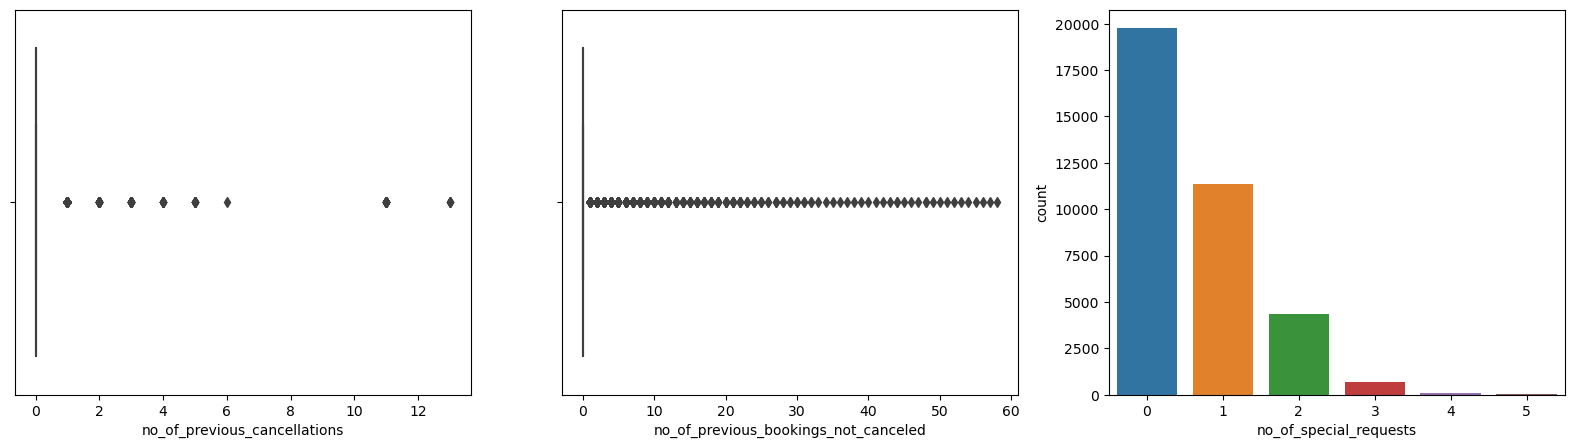

In [17]:
 # univariate, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests

fig,ax=plt.subplots(1,3, figsize=(20,5))
sns.boxplot(data=df, x="no_of_previous_cancellations", ax=ax[0]);
sns.boxplot(data=df, x="no_of_previous_bookings_not_canceled", ax=ax[1]);
sns.countplot(data=df, x="no_of_special_requests", ax=ax[2]);

In [18]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

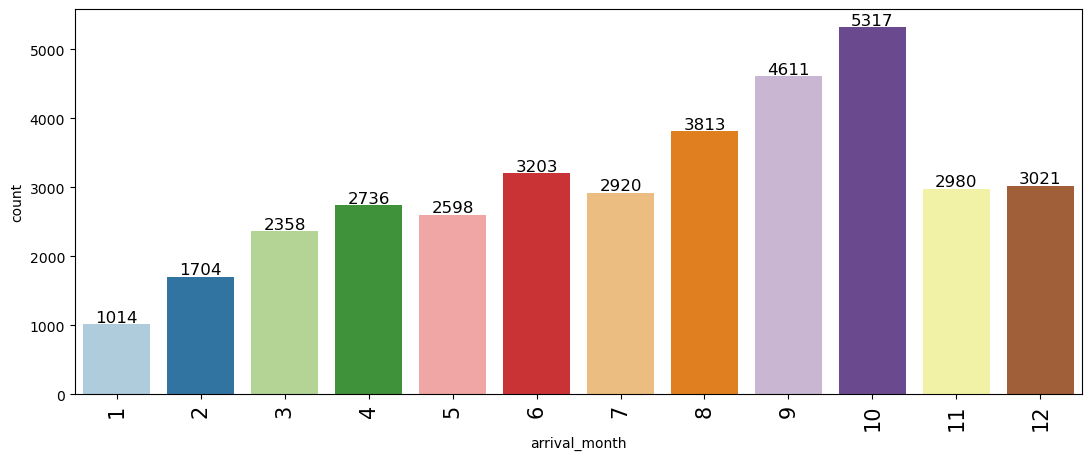

In [19]:
labeled_barplot(df, "arrival_month")

# Plot for each month in a grid 
<h1>Set a consistent y-axis range (avg_price_per_room)</h1>

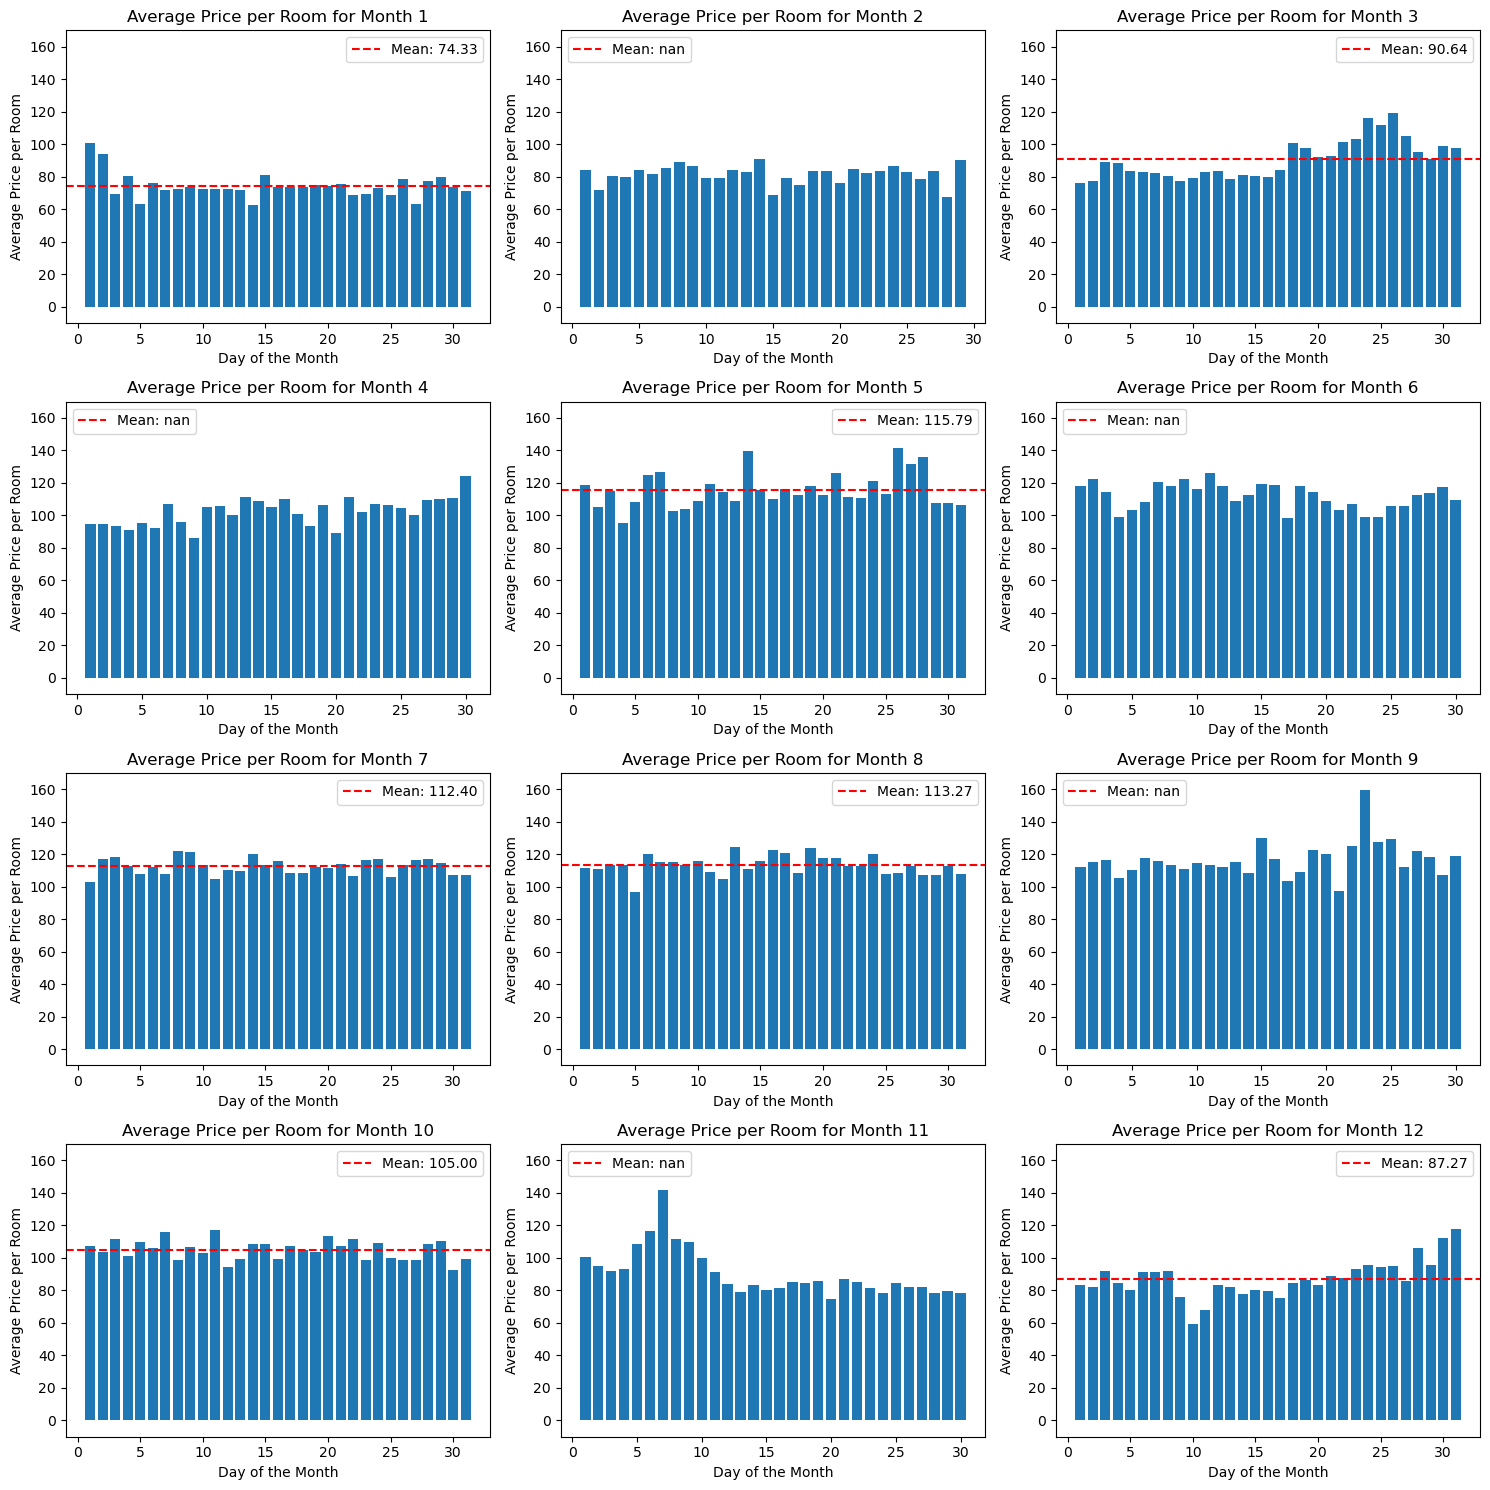

In [20]:
# Function to create bar plots for each month
def plot_day_avg_price_subplot(ax, df, month, ylim):
    df_month = df[df['arrival_month'] == month]
    day_avg_price = df_month.groupby('arrival_date')['avg_price_per_room'].mean()
    
    mean_value = np.mean(day_avg_price.values)
    
    ax.bar(day_avg_price.index, day_avg_price.values)
    ax.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.legend()
    ax.set_xlabel('Day of the Month')
    ax.set_ylabel('Average Price per Room')
    ax.set_title(f'Average Price per Room for Month {month}')
    ax.set_ylim(ylim)

# Plot for each month in a grid
months = df['arrival_month'].unique()
sorted_months = sorted(months)
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.ravel()

# Set a consistent y-axis range
y_min = df['avg_price_per_room'].min() - 10
y_max = 170
ylim = (y_min, y_max)

for i, month in enumerate(sorted_months):
    plot_day_avg_price_subplot(axes[i], df, month, ylim)

plt.tight_layout()
plt.show()

In [21]:
print('Canceled_rate is',len(df[df['booking_status'] == 'Canceled'])*100/len(df),'%')

Canceled_rate is 32.76361130254997 %


In [22]:
df['total_guest'] = df['no_of_adults'] + df['no_of_children']
df['total_night'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['date'] = df['date'] = pd.to_datetime(dict(year=df.arrival_year, month=df.arrival_month, day=df.arrival_date), errors='coerce')
df['total_previous_booking'] = df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled']
df['previous_booking_rate'] = np.where(df['total_previous_booking'] < 1 ,df['total_previous_booking'],df['no_of_previous_bookings_not_canceled']*100 / df['total_previous_booking'])

In [23]:
df.loc[(df["arrival_year"]==2018) & (df["arrival_month"]==2) & (df["arrival_date"]==29)].count()\
        ["arrival_date"]


37

In [24]:
df.drop(df[(df["arrival_year"]==2018) & (df["arrival_month"]==2) & \
                          (df["arrival_date"]==29)].index, inplace=True)
df.shape

(36238, 24)

There are 36238 rows after dropping the impossible date 29th feb 2018

In [25]:
# combining arrival_year, arrival_month & arrival_date to arrival_date_combined

from datetime import datetime
df["arrival_date_combined"] = pd.to_datetime(df.arrival_year.astype(str)+'/'+ \
                                               df.arrival_month.astype(str)+'/'+ \
                                               df.arrival_date.astype(str))

In [26]:
print(df["arrival_date_combined"].min())
print(df["arrival_date_combined"].max())

2017-07-01 00:00:00
2018-12-31 00:00:00


•	Dataset has dates between July, 2017 – December, 2018

# Correlation heatmap

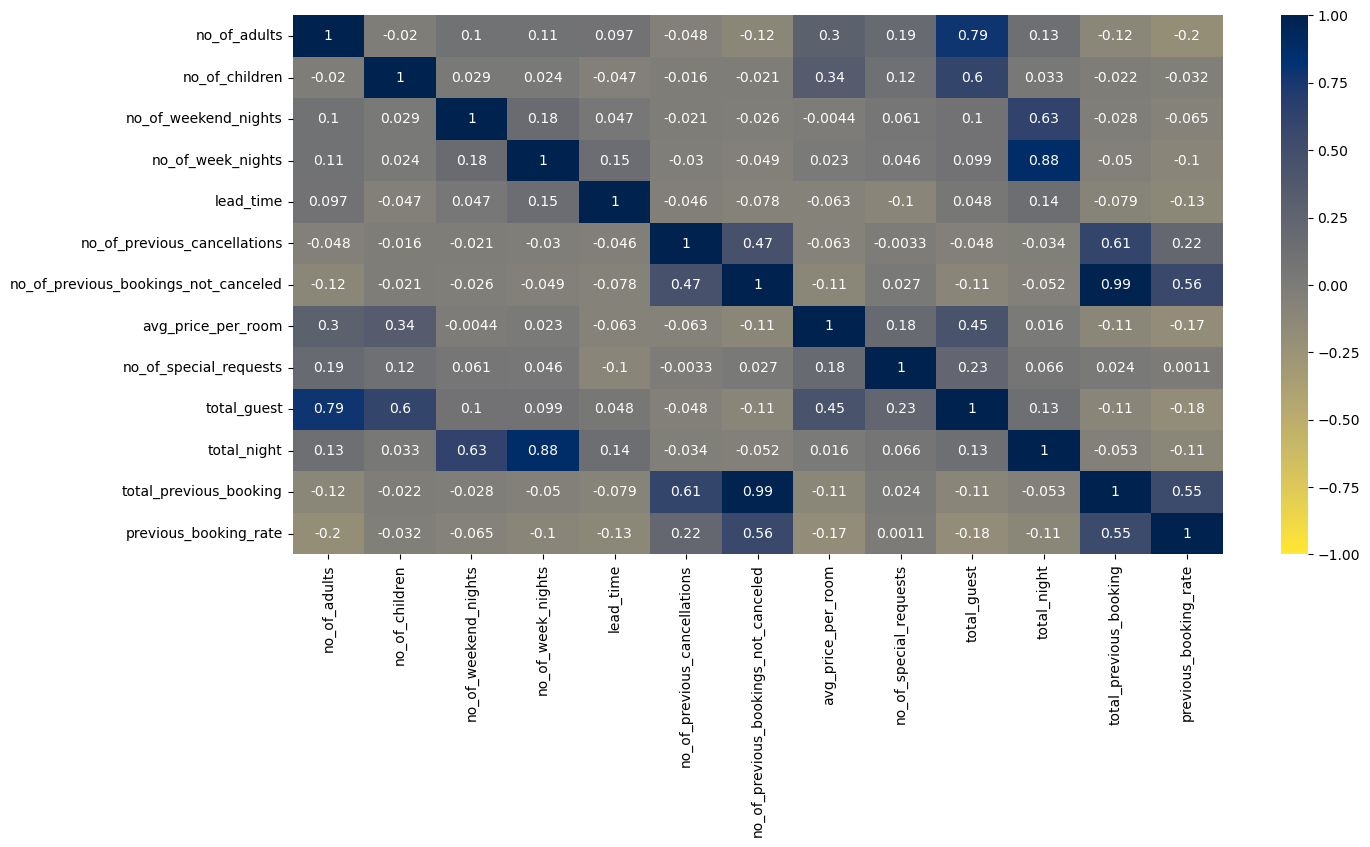

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="cividis_r")
plt.show()

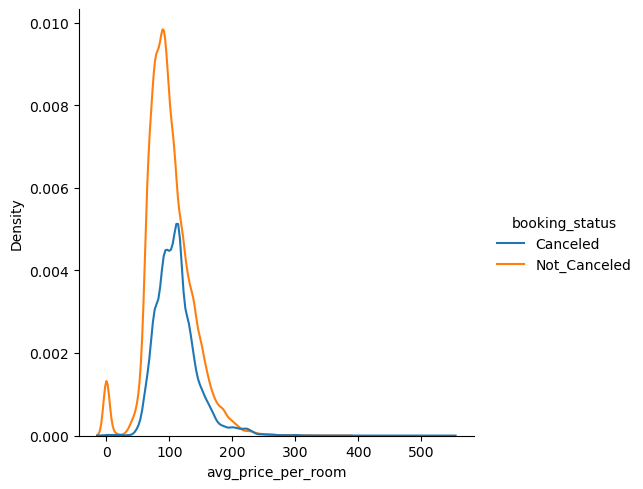

In [28]:
sns.displot(df,x="avg_price_per_room",hue="booking_status", kind="kde")

In [29]:
# remove the outliner of the data
def removeoutliner(col):
    sorted(col)
    q1,q2 = col.quantile([0.25,0.75])
    IQR = q2 - q1
    lowb = q1 -(1.5*IQR)
    upb = q2 +(1.5*IQR)
    return lowb,upb
lowb,upb = removeoutliner(df["avg_price_per_room"])

In [30]:
df_filtered = df[(df["avg_price_per_room"] < upb) & (df["avg_price_per_room"] > lowb)]

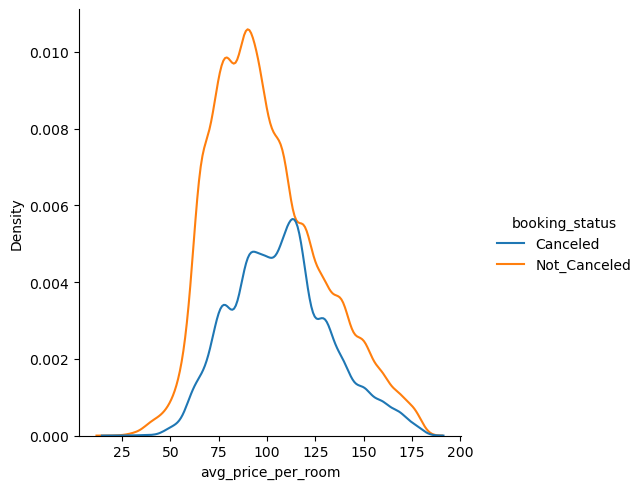

In [31]:
sns.displot(df_filtered,x="avg_price_per_room",hue="booking_status", kind="kde")


In [32]:
print("the average price per room is",df_filtered['avg_price_per_room'].mean())
print("the average price per room customer not canceled  is",df_filtered[df_filtered['booking_status'] == 'Not_Canceled']['avg_price_per_room'].mean())
print("the average price per room customer canceled is",df_filtered[df_filtered['booking_status'] == 'Canceled']['avg_price_per_room'].mean())

the average price per room is 102.11119203380724
the average price per room customer not canceled  is 99.62836177030947
the average price per room customer canceled is 107.11673738432091


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 2'),
  Text(2, 0, 'Room_Type 3'),
  Text(3, 0, 'Room_Type 4'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 6'),
  Text(6, 0, 'Room_Type 7')])

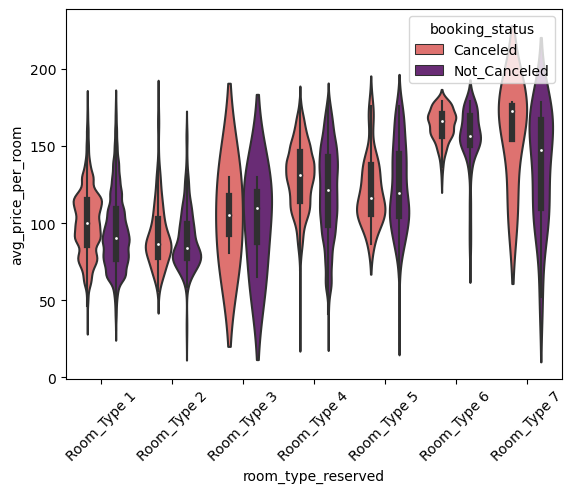

In [33]:
sns.violinplot(data=df_filtered, x="room_type_reserved", y="avg_price_per_room", hue="booking_status",palette="magma_r")
plt.xticks(rotation=45)

# Relationship of booking status and month of arrival

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

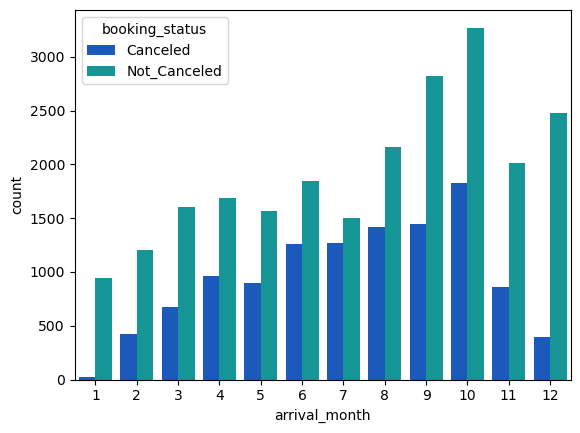

In [34]:
sns.countplot(data=df_filtered, x="arrival_month",palette="winter", hue="booking_status")

# Relationship of booking status and year of arrival

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

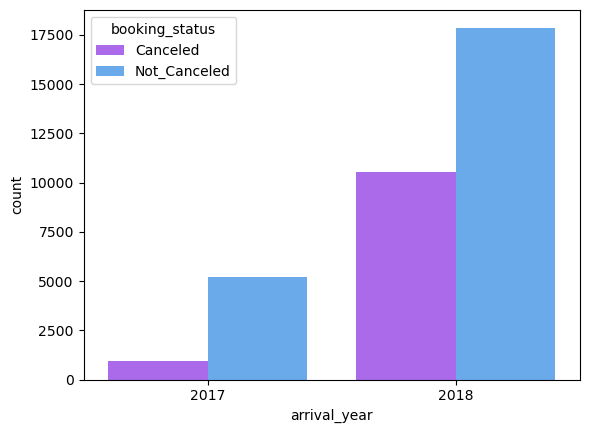

In [35]:
sns.countplot(data=df_filtered, x="arrival_year",palette = "cool_r", hue="booking_status")

In [36]:
df_2018 = df_filtered[df_filtered['arrival_year'] == 2018]
df_2017 = df_filtered[df_filtered['arrival_year'] == 2017]

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

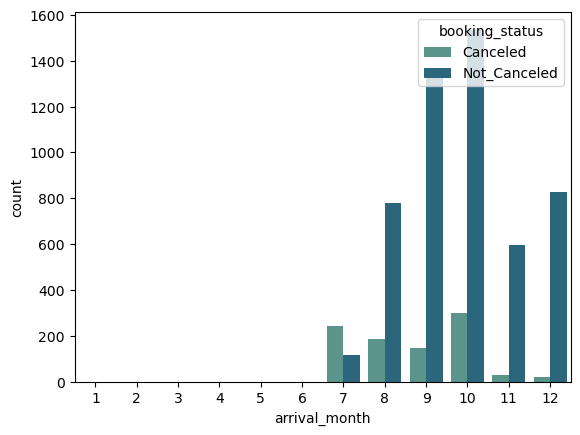

In [37]:
sns.countplot(data=df_2017, x="arrival_month",palette="crest", hue="booking_status")

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

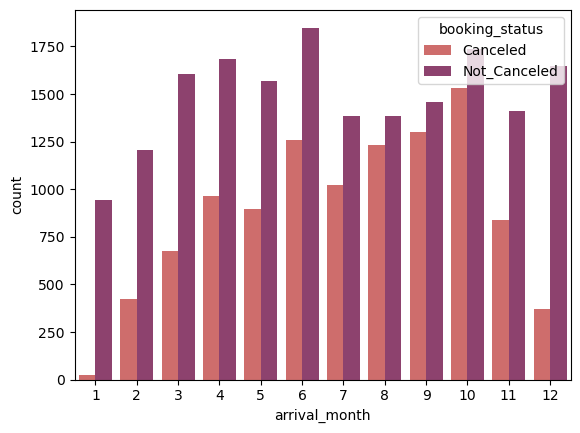

In [38]:
sns.countplot(data=df_2018, x="arrival_month",palette="flare", hue="booking_status")   

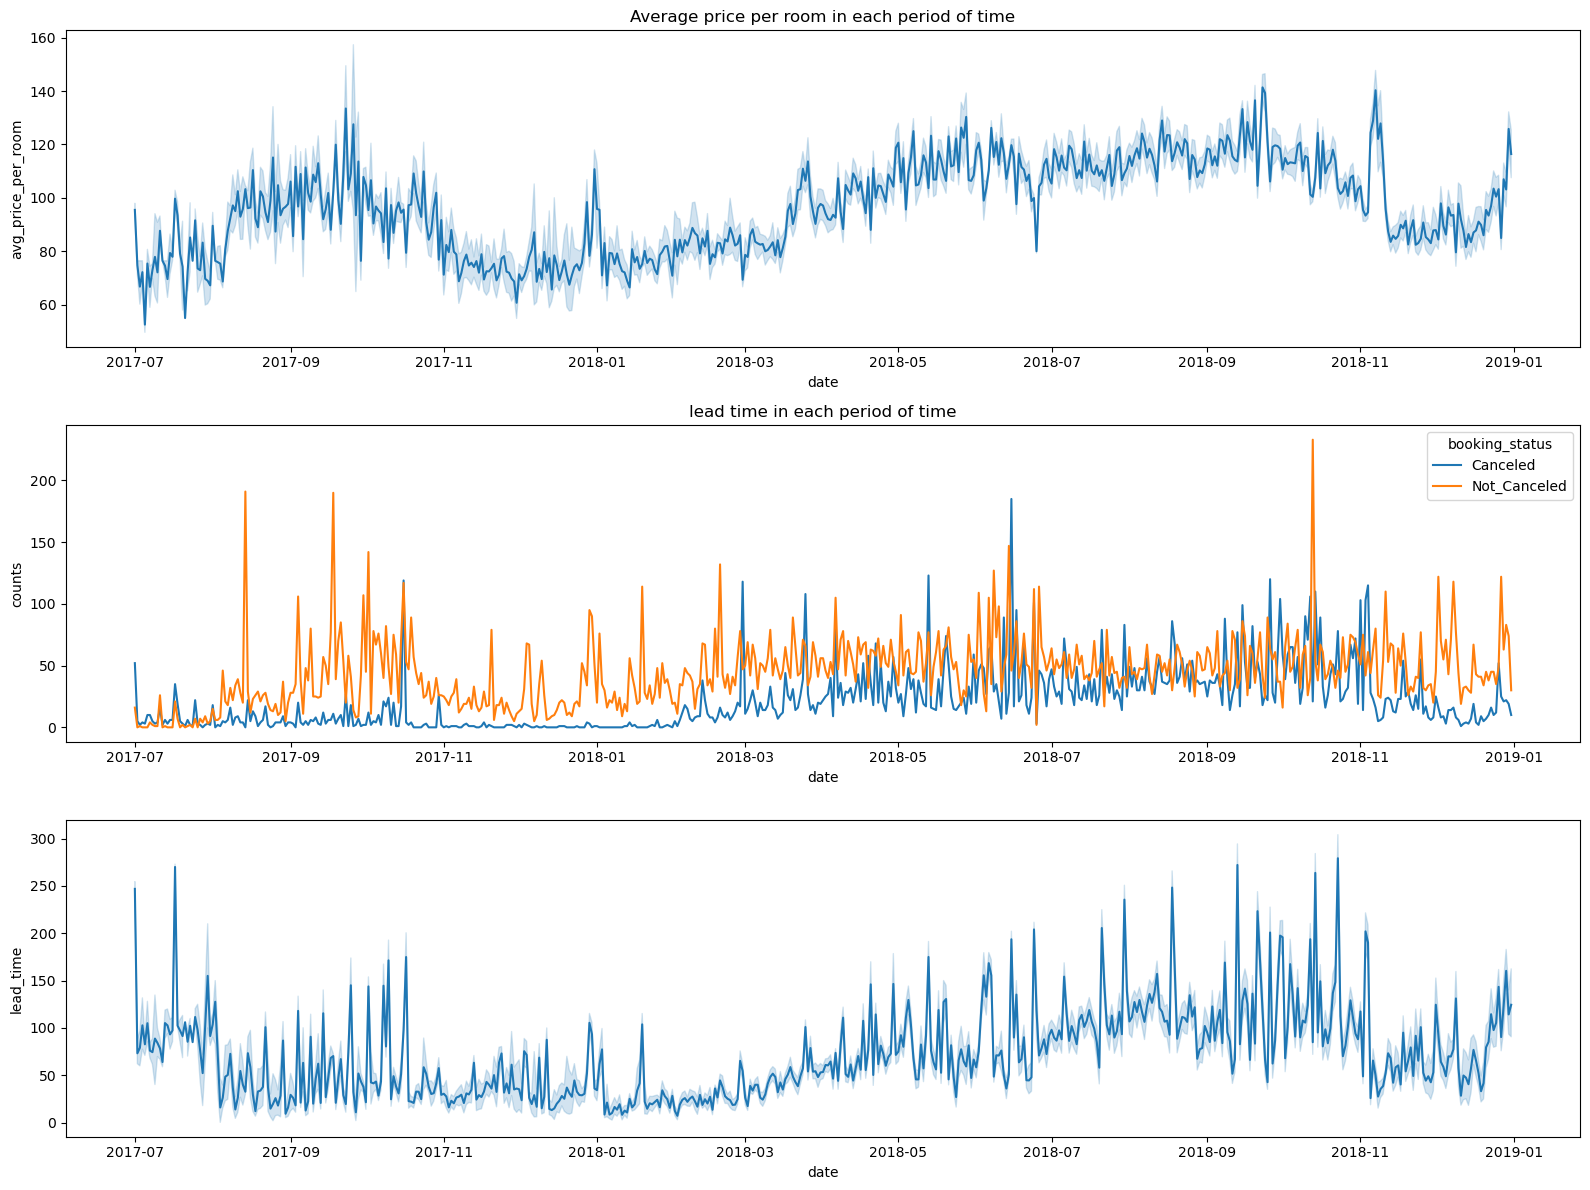

In [39]:
df_viz = df.copy()
df_viz = df_viz.groupby(['date','booking_status']).size().reset_index(name='counts')


fig, ax = plt.subplots(3, 1, figsize=(16, 12))
sns.lineplot(data=df_filtered, x="date",y="avg_price_per_room",ax=ax[0])
sns.lineplot(data=df_viz, x="date",y="counts",hue="booking_status",ax=ax[1])
sns.lineplot(data=df_filtered, x="date",y="lead_time",ax=ax[2])

ax[0].set_title('Average price per room in each period of time')
ax[1].set_title('lead time in each period of time')

plt.tight_layout()

<AxesSubplot:xlabel='lead_time', ylabel='booking_status'>

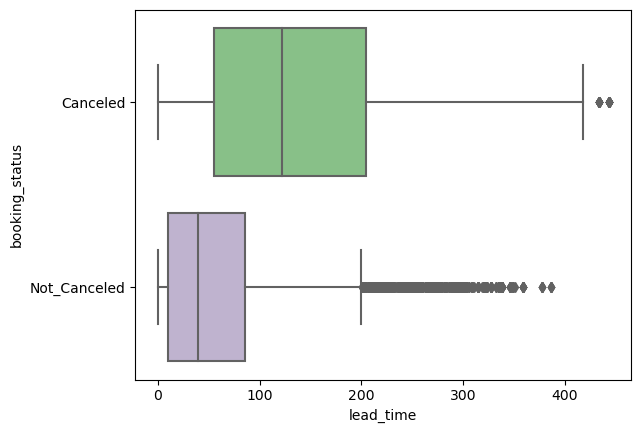

In [40]:
sns.boxplot(data=df, x="lead_time", y="booking_status", palette="Accent")

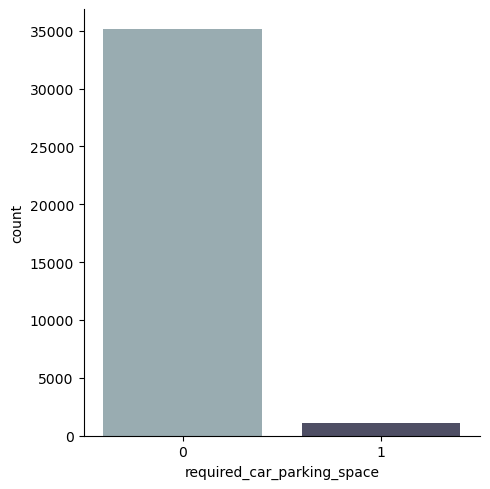

In [41]:
sns.catplot(data=df, x="required_car_parking_space", kind="count",height=5, palette= "bone_r")

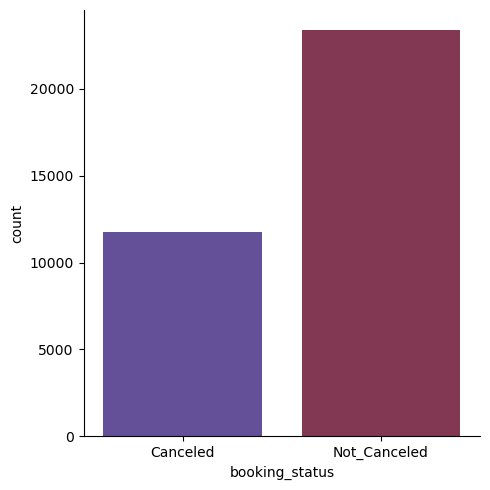

In [42]:
# look in the case where required car parking space = 0
sns.catplot(data=df[df["required_car_parking_space"] == 0], x="booking_status", kind="count",height=5,palette="twilight")

In [43]:
# customer no need the car parking space
df_no_car_parking=df[df["required_car_parking_space"] == 0]
total_number = len(df_no_car_parking["required_car_parking_space"])
number_cancel = len(df_no_car_parking["required_car_parking_space"][df_no_car_parking['booking_status'] == 'Canceled'])
print("total number of customer no need the car parking space is",total_number)
print("total number of cancel booking",number_cancel)
print("prob of cancel | customer no need the car parking space",number_cancel*100/total_number)

total number of customer no need the car parking space is 35117
total number of cancel booking 11764
prob of cancel | customer no need the car parking space 33.49944471338668


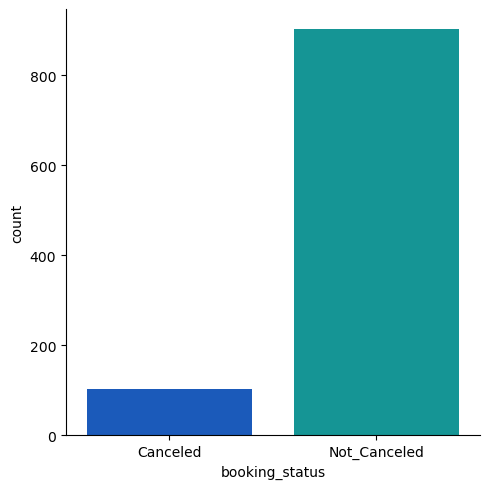

In [44]:
# look in the case where required car parking space = 1 
sns.catplot(data=df_filtered[df_filtered["required_car_parking_space"] == 1], x="booking_status", kind="count",height=5,palette="winter")

In [45]:
# customer need the car parking space
df_car_parking=df_filtered[df_filtered["required_car_parking_space"] == 1]
total_number_need = len(df_car_parking["required_car_parking_space"])
number_Not_cancel = len(df_car_parking["required_car_parking_space"][df_car_parking['booking_status'] == 'Canceled'])
print("total number of customer need the car parking space is",total_number_need)
print("total number of cancel booking",number_Not_cancel)
print("prob of cancel | customer need the car parking space",number_Not_cancel*100/total_number_need)

total number of customer need the car parking space is 1006
total number of cancel booking 104
prob of cancel | customer need the car parking space 10.337972166998012


from the stat, show us the

prob of customer how going to cancel the booking given the customer need the car parking space is 10.3%

prob of customer how going to cancel the booking given the customer no need the car parking space is 33.8%

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

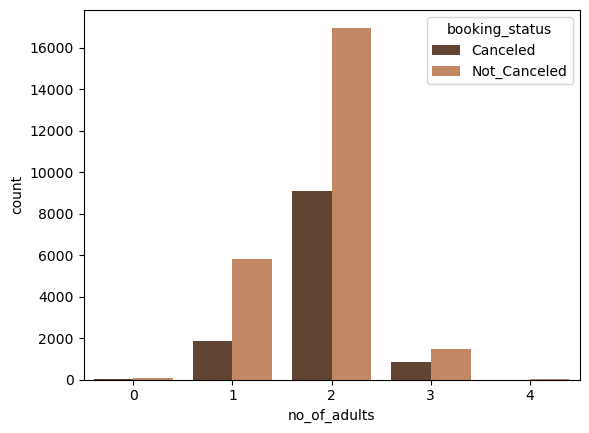

In [46]:
sns.countplot(data=df, x="no_of_adults",palette="copper", hue="booking_status")

In [47]:
def prob_cal(df,col_name):
    unique_list= pd.unique(df[col_name])
    for i in unique_list:
        df_all = df[df[col_name] == i]
        print('probability booking is Canceled given',col_name,'=',i,'is',len(df_all[df_all['booking_status'] == 'Canceled'])*100/len(df_all))

In [48]:
prob_cal(df,"no_of_adults")

probability booking is Canceled given no_of_adults = 2 is 34.931585604231344
probability booking is Canceled given no_of_adults = 1 is 24.153204794163628
probability booking is Canceled given no_of_adults = 3 is 37.26252158894646
probability booking is Canceled given no_of_adults = 0 is 31.654676258992804
probability booking is Canceled given no_of_adults = 4 is 18.75


<AxesSubplot:xlabel='no_of_children', ylabel='count'>

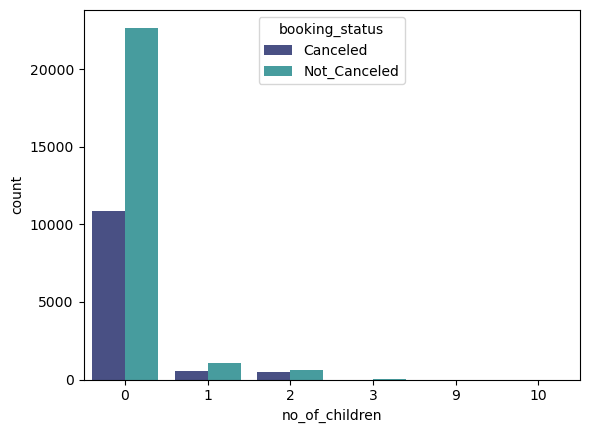

In [49]:
sns.countplot(data=df, x="no_of_children", palette="mako", hue="booking_status")

In [50]:
prob_cal(df,"no_of_children")

probability booking is Canceled given no_of_children = 0 is 32.42606725494873
probability booking is Canceled given no_of_children = 2 is 43.27651515151515
probability booking is Canceled given no_of_children = 1 is 33.29207920792079
probability booking is Canceled given no_of_children = 3 is 26.31578947368421
probability booking is Canceled given no_of_children = 10 is 0.0
probability booking is Canceled given no_of_children = 9 is 50.0


<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='count'>

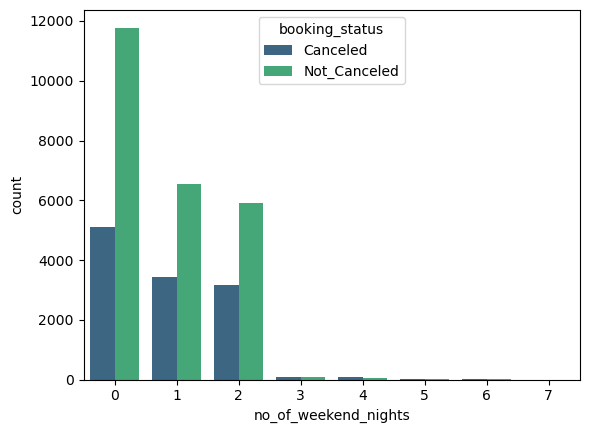

In [51]:
sns.countplot(data=df, x="no_of_weekend_nights",palette="viridis",  hue="booking_status")

In [52]:
prob_cal(df,"no_of_weekend_nights")

probability booking is Canceled given no_of_weekend_nights = 1 is 34.39100311276233
probability booking is Canceled given no_of_weekend_nights = 2 is 34.803219049718884
probability booking is Canceled given no_of_weekend_nights = 0 is 30.18610715979137
probability booking is Canceled given no_of_weekend_nights = 4 is 64.34108527131782
probability booking is Canceled given no_of_weekend_nights = 3 is 48.68421052631579
probability booking is Canceled given no_of_weekend_nights = 6 is 80.0
probability booking is Canceled given no_of_weekend_nights = 5 is 85.29411764705883
probability booking is Canceled given no_of_weekend_nights = 7 is 100.0


<b>insight</b> more number of day customer at hotel , the more likely the customer is going to cancel the booking

<AxesSubplot:xlabel='no_of_week_nights', ylabel='count'>

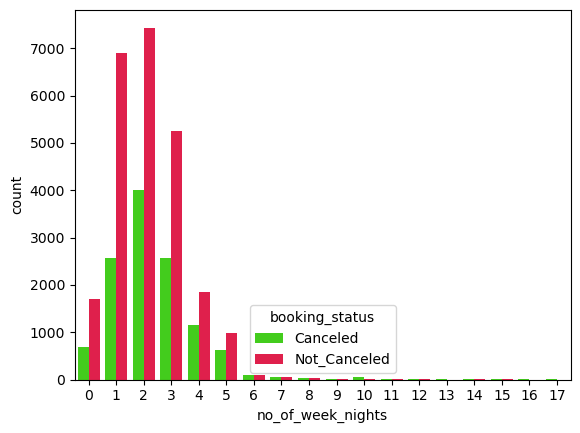

In [53]:
sns.countplot(data=df, x="no_of_week_nights", palette="prism", hue="booking_status")


In [54]:
prob_cal(df,"no_of_weekend_nights")

probability booking is Canceled given no_of_weekend_nights = 1 is 34.39100311276233
probability booking is Canceled given no_of_weekend_nights = 2 is 34.803219049718884
probability booking is Canceled given no_of_weekend_nights = 0 is 30.18610715979137
probability booking is Canceled given no_of_weekend_nights = 4 is 64.34108527131782
probability booking is Canceled given no_of_weekend_nights = 3 is 48.68421052631579
probability booking is Canceled given no_of_weekend_nights = 6 is 80.0
probability booking is Canceled given no_of_weekend_nights = 5 is 85.29411764705883
probability booking is Canceled given no_of_weekend_nights = 7 is 100.0


<AxesSubplot:xlabel='no_of_adults', ylabel='avg_price_per_room'>

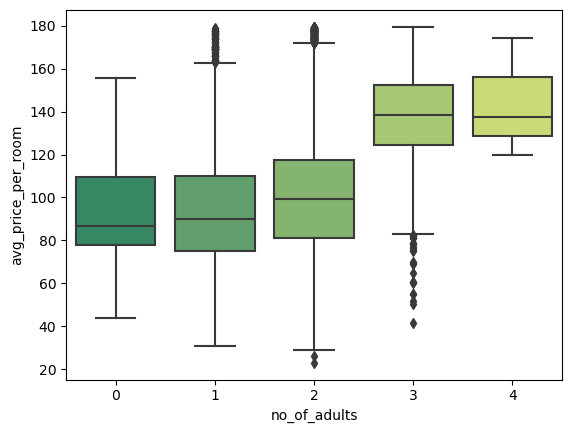

In [55]:
sns.boxplot(data=df_filtered[df_filtered.total_guest<=5], x="no_of_adults", y="avg_price_per_room",palette="summer")

<AxesSubplot:xlabel='no_of_children', ylabel='avg_price_per_room'>

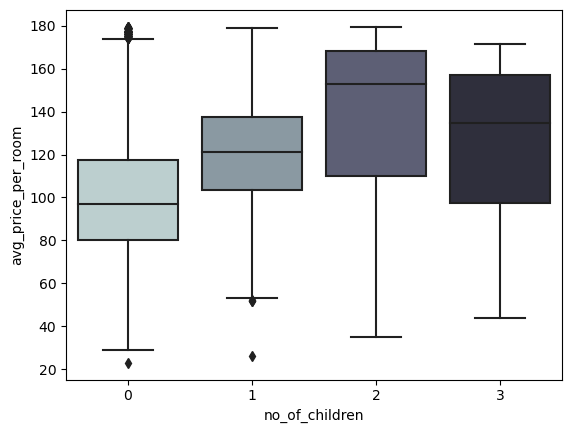

In [56]:
sns.boxplot(data=df_filtered[df_filtered.total_guest<=5], x="no_of_children", y="avg_price_per_room", palette= "bone_r")

<AxesSubplot:xlabel='total_guest', ylabel='avg_price_per_room'>

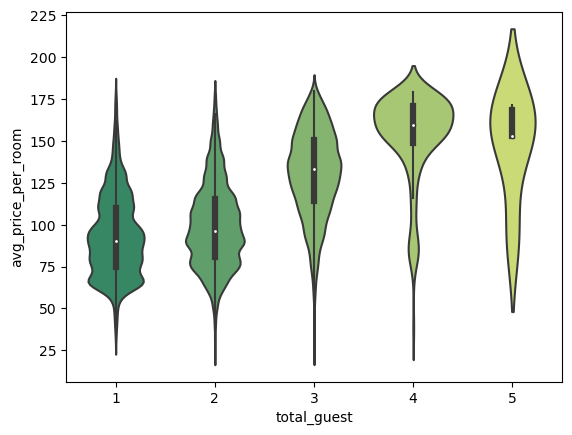

In [57]:
sns.violinplot(data=df_filtered[df_filtered.total_guest<=5], x="total_guest", y="avg_price_per_room",palette="summer")

probability booking is Canceled given type_of_meal_plan = Meal Plan 1 is 31.195597439033165
probability booking is Canceled given type_of_meal_plan = Not Selected is 33.105868590368495
probability booking is Canceled given type_of_meal_plan = Meal Plan 2 is 45.608721986674745
probability booking is Canceled given type_of_meal_plan = Meal Plan 3 is 20.0


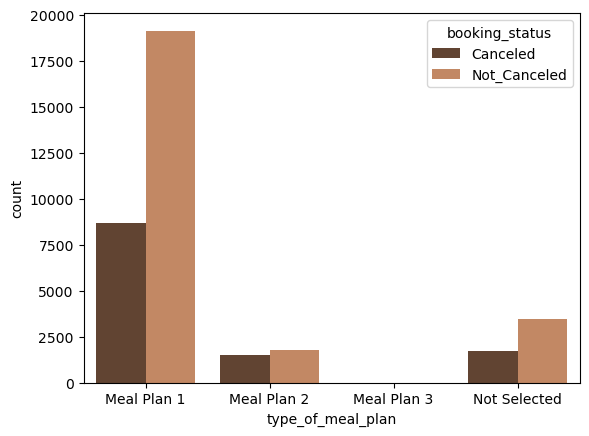

In [58]:
sns.countplot(data=df, x="type_of_meal_plan", palette="copper", hue="booking_status")
prob_cal(df,"type_of_meal_plan")

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

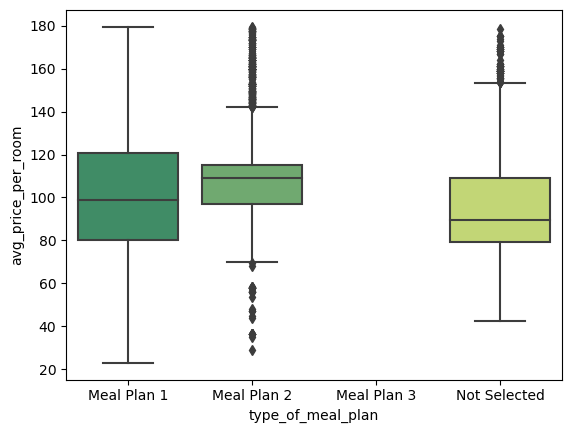

In [59]:
sns.boxplot(data=df_filtered, x="type_of_meal_plan", y="avg_price_per_room", palette="summer")

probability booking is Canceled given room_type_reserved = Room_Type 1 is 32.25760540829034
probability booking is Canceled given room_type_reserved = Room_Type 4 is 34.18746900314102
probability booking is Canceled given room_type_reserved = Room_Type 2 is 32.947976878612714
probability booking is Canceled given room_type_reserved = Room_Type 6 is 42.11618257261411
probability booking is Canceled given room_type_reserved = Room_Type 5 is 27.376425855513308
probability booking is Canceled given room_type_reserved = Room_Type 7 is 22.78481012658228
probability booking is Canceled given room_type_reserved = Room_Type 3 is 28.571428571428573


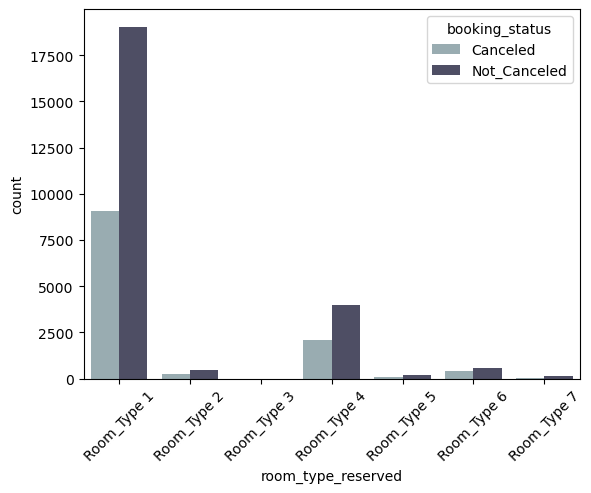

In [60]:
sns.countplot(data=df, x="room_type_reserved",palette= "bone_r", hue="booking_status")
plt.xticks(rotation=45)
prob_cal(df,"room_type_reserved")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 2'),
  Text(2, 0, 'Room_Type 3'),
  Text(3, 0, 'Room_Type 4'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 6'),
  Text(6, 0, 'Room_Type 7')])

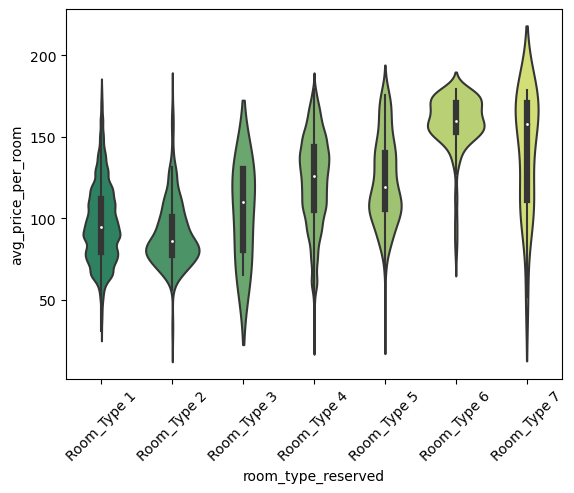

In [61]:
sns.violinplot(data=df_filtered, x="room_type_reserved", y="avg_price_per_room", palette="summer")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

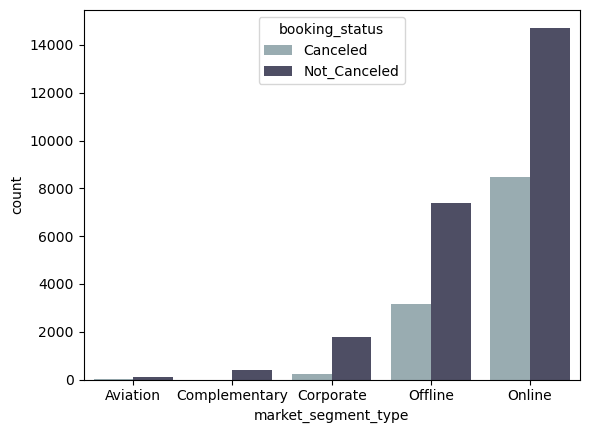

In [62]:
sns.countplot(data=df, x="market_segment_type", hue="booking_status", palette= "bone_r")

In [63]:
prob_cal(df,"market_segment_type")


probability booking is Canceled given market_segment_type = Offline is 29.96767446282563
probability booking is Canceled given market_segment_type = Online is 36.513753556954384
probability booking is Canceled given market_segment_type = Corporate is 10.939830929885629
probability booking is Canceled given market_segment_type = Aviation is 29.6
probability booking is Canceled given market_segment_type = Complementary is 0.0


<b>insight</b> from the data show that coporate and complementary segment is the customer who is less canceled

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Offline'),
  Text(4, 0, 'Online')])

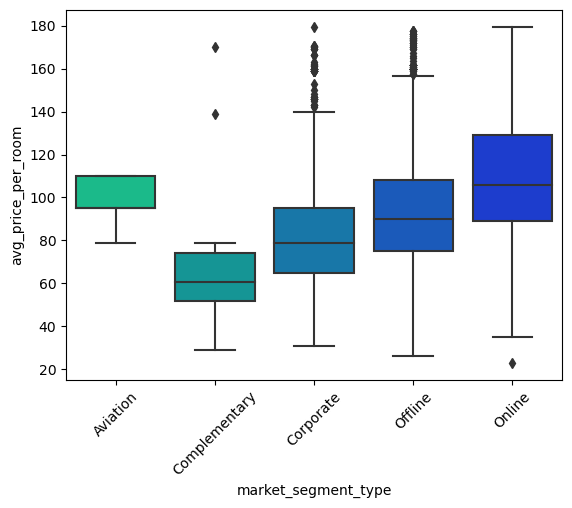

In [64]:
sns.boxplot(data=df_filtered, x="market_segment_type", y="avg_price_per_room", palette= "winter_r")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='repeated_guest', ylabel='count'>

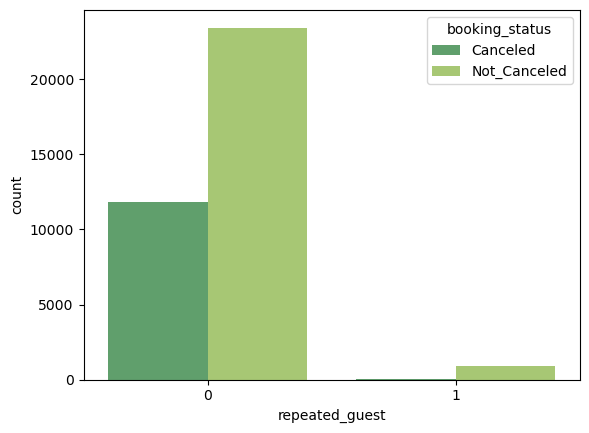

In [65]:
sns.countplot(data=df, x="repeated_guest", palette="summer",hue="booking_status")

In [66]:
prob_cal(df,"repeated_guest")

probability booking is Canceled given repeated_guest = 0 is 33.594811961939286
probability booking is Canceled given repeated_guest = 1 is 1.6198704103671706


probability booking is Canceled given no_of_previous_cancellations = 0 is 33.04364780925322
probability booking is Canceled given no_of_previous_cancellations = 3 is 2.3255813953488373
probability booking is Canceled given no_of_previous_cancellations = 1 is 5.0761421319796955
probability booking is Canceled given no_of_previous_cancellations = 2 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 11 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 4 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 5 is 0.0
probability booking is Canceled given no_of_previous_cancellations = 13 is 100.0
probability booking is Canceled given no_of_previous_cancellations = 6 is 0.0


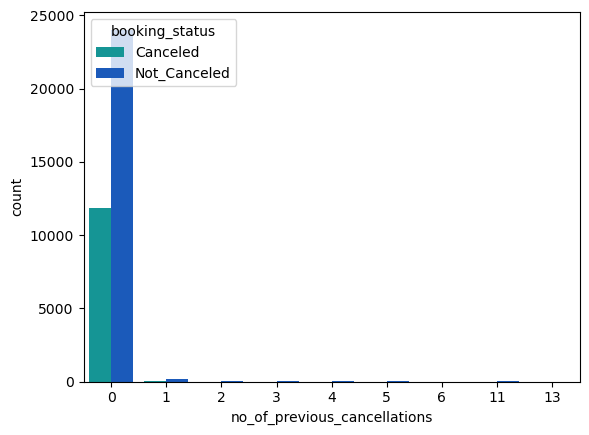

In [67]:
sns.countplot(data=df, x="no_of_previous_cancellations", hue="booking_status", palette= "winter_r")
prob_cal(df,"no_of_previous_cancellations")

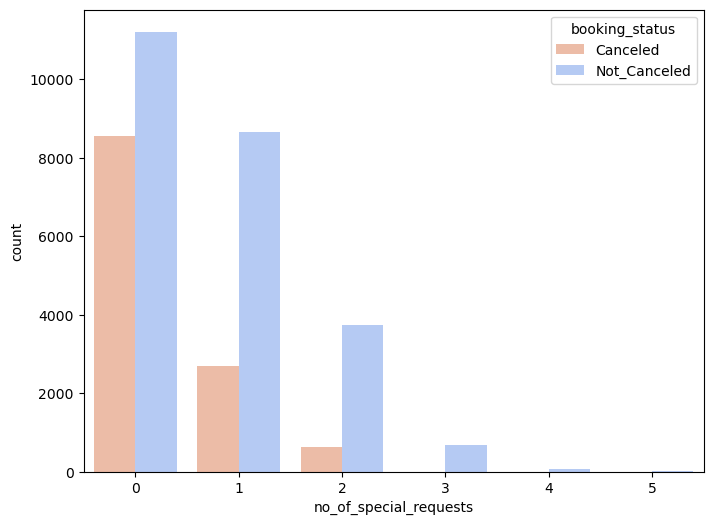

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='no_of_special_requests', hue="booking_status", palette= "coolwarm_r")
plt.show()

In [69]:
prob_cal(df,"no_of_special_requests")

probability booking is Canceled given no_of_special_requests = 0 is 43.23831704723811
probability booking is Canceled given no_of_special_requests = 1 is 23.77013112734313
probability booking is Canceled given no_of_special_requests = 3 is 0.0
probability booking is Canceled given no_of_special_requests = 2 is 14.600045840018335
probability booking is Canceled given no_of_special_requests = 4 is 0.0
probability booking is Canceled given no_of_special_requests = 5 is 0.0


<b>insight</b> no_of_special_requests more than 3 likely to have less Canceled

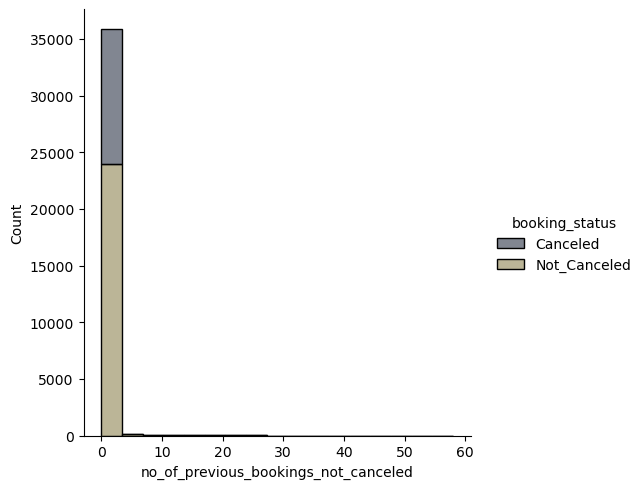

In [70]:
lowb, upb = removeoutliner(df["no_of_previous_cancellations"])

sns.displot(df[df["no_of_previous_cancellations"] < 20], x="no_of_previous_bookings_not_canceled",palette="cividis",hue="booking_status"
            ,multiple="stack",height=5)

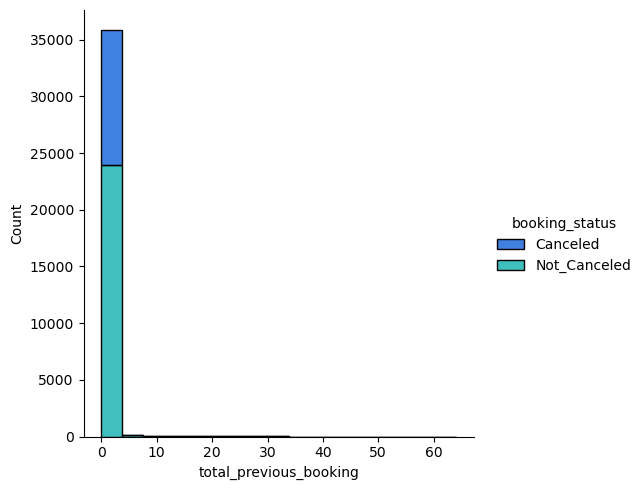

In [71]:
sns.displot(df, x="total_previous_booking", palette="winter", hue="booking_status"
            ,multiple="stack",height=5)


# data preprocessing

In [72]:
#feature used for prediction

feature_cat = ['market_segment_type']
feature_label = ['required_car_parking_space','repeated_guest']
feature_num = ['total_guest','total_night','lead_time','no_of_special_requests','avg_price_per_room']

df_use = df[feature_num + feature_cat + feature_label +['booking_status']]
#encode the categorical data
df_encoded = pd.get_dummies(df_use, columns=feature_cat)
df_encoded.head()

,total_guest,total_night,lead_time,no_of_special_requests,avg_price_per_room,required_car_parking_space,repeated_guest,booking_status,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,3,224,0,65.00,0,0,Not_Canceled,0,0,0,1,0
1,2,5,5,1,106.68,0,0,Not_Canceled,0,0,0,0,1
2,1,3,1,0,60.00,0,0,Canceled,0,0,0,0,1
3,2,2,211,0,100.00,0,0,Canceled,0,0,0,0,1
4,2,2,48,0,94.50,0,0,Canceled,0,0,0,0,1


In [73]:
le=LabelEncoder()

X = df_encoded.drop('booking_status', axis=1)
df_encoded['booking_status'] = le.fit_transform(df_encoded['booking_status'])

# Label encoding for y
y = df_encoded['booking_status']
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36238, dtype: int32

In [74]:
#Under sampling the data
rus = RandomUnderSampler(random_state=42)

# create model

In [75]:
sc = StandardScaler()

dc = DecisionTreeClassifier(random_state=24)
rf= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()
svm= SVC(random_state=24)
lr = LogisticRegression(max_iter=1000,random_state=24)

models = [dc,rf,knn,svm,lr]

# train test split

In [76]:
X_train_test_spilt = X.copy()
y_train_test_spilt = y.copy()

# Unsampling the data
X_train_test_spilt, y_train_test_spilt = rus.fit_resample(X_train_test_spilt, y_train_test_spilt)

X_train , X_test, y_train, y_test = train_test_split(X_train_test_spilt, y_train_test_spilt, test_size=0.2, random_state=24)

# protect the data leaking from the test data
# normalize the train data
X_train[feature_num] = sc.fit_transform(X_train[feature_num])

# normalize the test data
X_test[feature_num] = sc.transform(X_test[feature_num])

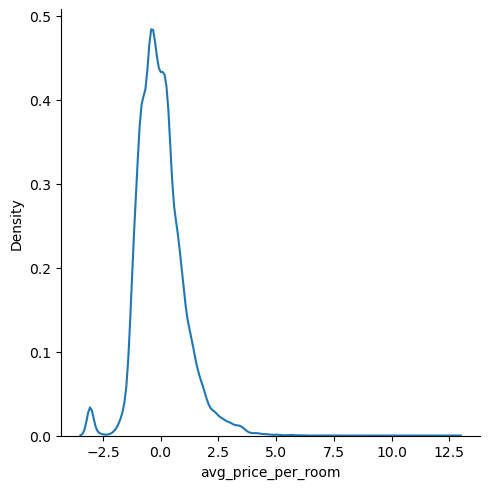

In [77]:
sns.displot(X_train,x="avg_price_per_room", kind="kde")

In [78]:
train_data = pd.concat([X_train,y_train],axis=1)
train_data

,total_guest,total_night,lead_time,no_of_special_requests,avg_price_per_room,required_car_parking_space,repeated_guest,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
23181,0.048556,0.486750,1.841270,-0.729940,-0.737772,0,0,0,0,0,1,0,1
15134,0.048556,-0.580047,-0.274184,-0.729940,-0.115151,0,0,0,0,0,1,0,1
17794,-1.491929,-0.580047,-0.446875,-0.729940,-0.708813,0,0,0,0,0,1,0,1
20773,0.048556,-0.046648,-0.673530,-0.729940,-0.013794,0,0,0,0,0,1,0,1
6380,0.048556,-0.580047,0.934647,0.608648,0.385842,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21633,-1.491929,-1.113445,-0.781462,0.608648,-0.042753,0,0,0,0,0,0,1,1
19857,0.048556,-0.046648,-0.630358,1.947235,-0.057232,0,0,0,0,0,0,1,1
14528,-1.491929,-1.113445,-0.738289,-0.729940,-1.230078,0,0,0,0,0,1,0,1
899,0.048556,2.086945,1.852063,0.608648,1.133857,0,0,0,0,0,0,1,0


In [79]:
## remove the outlier before train the model
lowb,upb = removeoutliner(train_data["avg_price_per_room"])
train_data = train_data[(train_data["avg_price_per_room"] < upb) & (train_data["avg_price_per_room"] > lowb)]

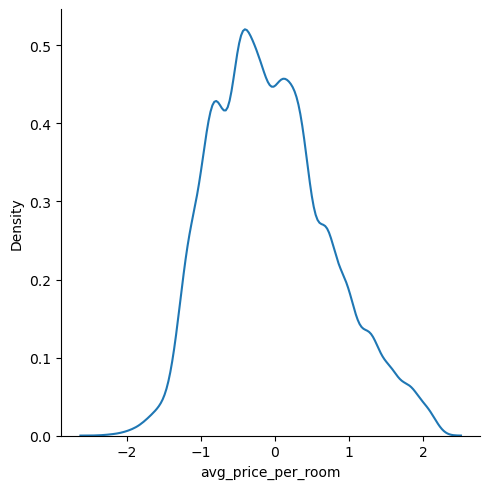

In [80]:
sns.displot(train_data,x="avg_price_per_room", kind="kde")

In [81]:
all_col = list(train_data)
all_col.remove('booking_status')
X_train = train_data[all_col]
y_train = train_data['booking_status']

In [82]:
X_train.dtypes

total_guest                           float64
total_night                           float64
lead_time                             float64
no_of_special_requests                float64
avg_price_per_room                    float64
required_car_parking_space           category
repeated_guest                       category
market_segment_type_Aviation            uint8
market_segment_type_Complementary       uint8
market_segment_type_Corporate           uint8
market_segment_type_Offline             uint8
market_segment_type_Online              uint8
dtype: object

In [83]:
X_train

,total_guest,total_night,lead_time,no_of_special_requests,avg_price_per_room,required_car_parking_space,repeated_guest,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
23181,0.048556,0.486750,1.841270,-0.729940,-0.737772,0,0,0,0,0,1,0
15134,0.048556,-0.580047,-0.274184,-0.729940,-0.115151,0,0,0,0,0,1,0
17794,-1.491929,-0.580047,-0.446875,-0.729940,-0.708813,0,0,0,0,0,1,0
20773,0.048556,-0.046648,-0.673530,-0.729940,-0.013794,0,0,0,0,0,1,0
6380,0.048556,-0.580047,0.934647,0.608648,0.385842,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21633,-1.491929,-1.113445,-0.781462,0.608648,-0.042753,0,0,0,0,0,0,1
19857,0.048556,-0.046648,-0.630358,1.947235,-0.057232,0,0,0,0,0,0,1
14528,-1.491929,-1.113445,-0.738289,-0.729940,-1.230078,0,0,0,0,0,1,0
899,0.048556,2.086945,1.852063,0.608648,1.133857,0,0,0,0,0,0,1


In [84]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (18182, 12)
Shape of test set :  (4752, 12)
Percentage of classes in training set:
0    0.504235
1    0.495765
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.5
0    0.5
Name: booking_status, dtype: float64


In [85]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [86]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# BUILDING A LOGISTIC REGRESSION MODEL
<H2>WITH SKLEARN LIBRARY</H2>

In [87]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [88]:
# predicting on training set
y_pred_train = lg.predict(X_train)

# MODEL PERFORMANCE EVALUATION

In [89]:
print("Training set performance:")

sklearn_perf_train = pd.DataFrame(
        {"Accuracy": accuracy_score(y_train, y_pred_train), \
         "Recall": recall_score(y_train, y_pred_train), \
         "Precision": precision_score(y_train, y_pred_train),\
         "F1": f1_score(y_train, y_pred_train),},
        index=[0],\
        )
sklearn_perf_train

Training set performance:


,Accuracy,Recall,Precision,F1
0,0.773402,0.784779,0.764426,0.774469


In [90]:
# predicting on the test set
y_pred_test = lg.predict(X_test)
print("Test set performance:")

sklearn_perf_test = pd.DataFrame(
        {"Accuracy": accuracy_score(y_test, y_pred_test), \
         "Recall": recall_score(y_test, y_pred_test), \
         "Precision": precision_score(y_test, y_pred_test),\
         "F1": f1_score(y_test, y_pred_test),},
        index=[0],\
        )
sklearn_perf_test

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.775884,0.787037,0.769864,0.778356


In [91]:
print('Train set mean: ', np.mean(y_train))
print('Test set mean: ', np.mean(y_test))

Train set mean:  0.4957650423495765
Test set mean:  0.5


In [92]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2376
           1       0.77      0.79      0.78      2376

    accuracy                           0.78      4752
   macro avg       0.78      0.78      0.78      4752
weighted avg       0.78      0.78      0.78      4752

Predicted labels:  [1 0 1 ... 1 1 1]
Accuracy:  0.7758838383838383


In [93]:
confusion_matrix(y_test, predictions)

array([[1817,  559],
       [ 506, 1870]], dtype=int64)

In [94]:
y_predict_proba = model.predict_proba(X_test)
y_predict_proba

array([[0.24995286, 0.75004714],
       [0.59104939, 0.40895061],
       [0.38184407, 0.61815593],
       ...,
       [0.07887352, 0.92112648],
       [0.10765388, 0.89234612],
       [0.39914658, 0.60085342]])

In [95]:
pos_proba = y_predict_proba[:,1]
pos_proba

array([0.75004714, 0.40895061, 0.61815593, ..., 0.92112648, 0.89234612,
       0.60085342])

In [96]:
print('Median: ',np.median(pos_proba))
print('Mean: ', np.mean(pos_proba))
print('Standard deviation: ', np.std(pos_proba))

Median:  0.5125755441791111
Mean:  0.4974312309614975
Standard deviation:  0.3067091472405705


(array([665., 500., 419., 386., 357., 418., 434., 501., 565., 507.]),
 array([0.00143977, 0.10128307, 0.20112638, 0.30096968, 0.40081298,
        0.50065628, 0.60049958, 0.70034289, 0.80018619, 0.90002949,
        0.99987279]),
 <BarContainer object of 10 artists>)

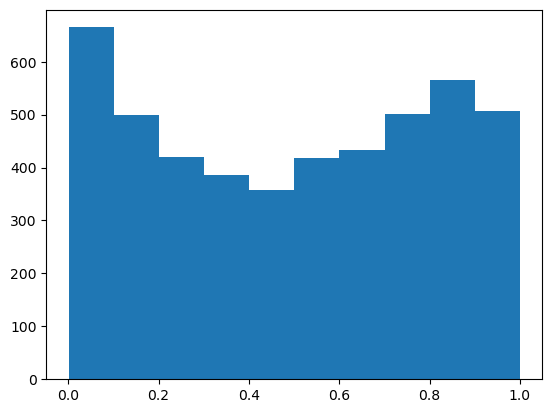

In [97]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

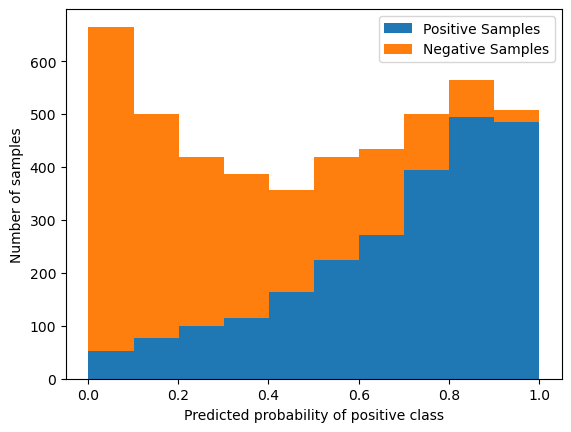

In [98]:
pos_sample_pos_proba = pos_proba[y_test == 1]
neg_sample_pos_proba = pos_proba[y_test == 0]

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive Samples', 'Negative Samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Text(0.5, 1.0, 'ROC curve')

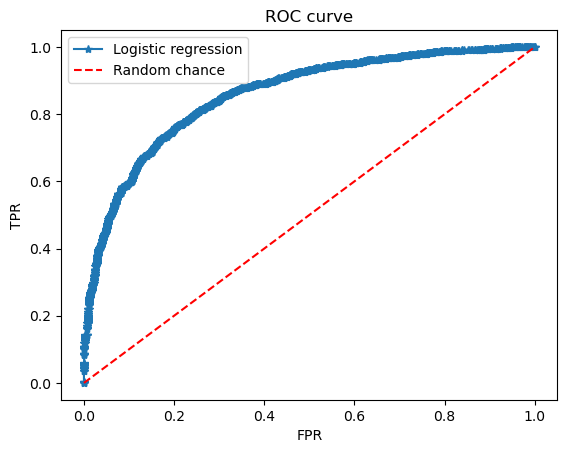

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')

plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')


In [100]:
metrics.roc_auc_score(y_test, pos_proba)

0.8576465057420444

In [101]:
def cal_model(_X_train,_X_test,_y_train,_y_test,model):
   
    model.fit(_X_train,_y_train)
    y_pred = model.predict(_X_test)
    print('###################################################')
    print("Model",type(model).__name__)
    print("Accuracy:",accuracy_score(_y_test, y_pred))
    print("Precision:",precision_score(_y_test, y_pred))
    print("Recall:",recall_score(_y_test, y_pred))
    print("F1 Score:",f1_score(_y_test, y_pred))
    #print("confusion_matrix:",confusion_matrix(_y_test, y_pred))
    
    plt.figure(figsize=(4,2))
    cm=confusion_matrix(y_pred,_y_test)
    sns.heatmap(cm,annot=True, fmt='.6g')
    plt.title("Confusion Matrix")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.show()

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
Dt = DecisionTreeClassifier()

In [104]:
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
predict = Dt.predict(X_test)
predict

array([1, 1, 1, ..., 1, 1, 0])

# Logistic Regression

In [106]:
lr_params = {
            'C': [0.1, 0.5, 0.9, 1, 2, 5],
            'penalty':['l1','l2'],
            'random_state':[24,32,56,65]
            }

params = {
        'estimator': LogisticRegression(),
        'param_distributions': lr_params,
        'cv': 5,
        'n_iter': 15,
        'n_jobs': -1,
        'scoring': 'roc_auc',
        }

lr_cv = RandomizedSearchCV(**params)

In [107]:
lr_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                                        'penalty': ['l1', 'l2'],
                                        'random_state': [24, 32, 56, 65]},
                   scoring='roc_auc')

In [108]:
lr_cv.best_params_
# lr_best_param = {'C': 5, 'penalty': 'l1', 'random_state': 24} 

{'random_state': 32, 'penalty': 'l2', 'C': 0.5}

In [109]:
lr_model = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
proba_lr = lr_model.predict_proba(X_test)

In [110]:
accuracy_score(y_test, y_pred_lr)

0.7765151515151515

In [111]:
cross_val_score(lr_model, X_test, y_test, cv = 10).mean()

0.7746231755860238

In [112]:
print(confusion_matrix(y_test, y_pred_lr))
print('\n')
print(classification_report(y_test, y_pred_lr))

[[1818  558]
 [ 504 1872]]


              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2376
           1       0.77      0.79      0.78      2376

    accuracy                           0.78      4752
   macro avg       0.78      0.78      0.78      4752
weighted avg       0.78      0.78      0.78      4752



In [113]:
def lr_curve():    
    fpr_lr, tpr_lr, thres_lr = roc_curve(y_test, proba_lr[:,1])
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.subplot(151)
    plt.title('ROC AUC Logistic Regression')
    plt.plot(fpr_lr, tpr_lr, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_lr,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_lr,tpr_lr, 0, facecolor='orange', alpha=1)
    plt.legend(loc = 'lower right')

# Random Forest Class.

In [114]:
rf_params = {
        'max_depth': [5, 10, 15, 20],
        'max_features': [2, 3, 5],
        'n_estimators': [100, 500, 1000],
        'min_samples_split': [5, 10, 15],
        }

params = {
        'estimator': RandomForestClassifier(),
        'param_distributions': rf_params,
        'cv': 5,
        'n_iter': 15,
        'n_jobs': -1,
        'scoring': 'roc_auc',
        }

rf_cv = RandomizedSearchCV(**params)


In [115]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': [2, 3, 5],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='roc_auc')

In [116]:
rf_cv.best_params_
# rf_best_param = {
#                'max_depth': 20,
#                'max_features': 3,
#                'min_samples_split': 5,
#                'n_estimators': 100
#                }

{'n_estimators': 500,
 'min_samples_split': 5,
 'max_features': 5,
 'max_depth': 20}

In [117]:
rf_model = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
proba_rf = rf_model.predict_proba(X_test)

In [118]:
accuracy_score(y_test, y_pred_rf)

0.8569023569023569

In [119]:
cross_val_score(rf_model, X_test, y_test, cv = 10).mean()


0.8367085360459973

In [120]:
print(confusion_matrix(y_test, y_pred_rf))
print('\n')
print(classification_report(y_test, y_pred_rf))

[[2014  362]
 [ 318 2058]]


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2376
           1       0.85      0.87      0.86      2376

    accuracy                           0.86      4752
   macro avg       0.86      0.86      0.86      4752
weighted avg       0.86      0.86      0.86      4752



In [121]:
def rf_curve():    
    fpr_rf, tpr_rf, thres_rf = roc_curve(y_test, proba_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    plt.subplot(152)
    plt.title('ROC AUC Random Forest')
    plt.plot(fpr_rf, tpr_rf, 'blue', label='AUC Rand. Forest = {}'.format(round(roc_auc_rf,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_rf,tpr_rf, 0, facecolor='lightyellow', alpha=1)
    plt.legend(loc = 'lower right')

# Gradient Boosting

In [122]:
gb_parameters = {
                'n_estimators': [100, 500, 1000],
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10],
                }

gb_params = {
            'estimator': GradientBoostingClassifier(),
            'param_distributions': gb_parameters,
            'cv': 5,
            'n_iter': 15,
            'n_jobs': -1,
            'scoring': 'roc_auc',
            }

gb_cv = RandomizedSearchCV(**gb_params)

In [123]:
gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='roc_auc')

In [124]:
gb_cv.best_params_
# gb_best_param = {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}

{'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}

In [125]:
gb_model = GradientBoostingClassifier(**gb_cv.best_params_).fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
proba_gb = gb_model.predict_proba(X_test)

In [126]:
accuracy_score(y_test, y_pred_gb)

0.8566919191919192

In [127]:
cross_val_score(gb_model, X_test, y_test, cv = 10).mean()

0.8278690844758957

In [128]:
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print(classification_report(y_test, y_pred_gb))

[[2016  360]
 [ 321 2055]]


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2376
           1       0.85      0.86      0.86      2376

    accuracy                           0.86      4752
   macro avg       0.86      0.86      0.86      4752
weighted avg       0.86      0.86      0.86      4752



In [129]:
def gb_curve():    
    fpr_gb, tpr_gb, thres_gb = roc_curve(y_test, proba_gb[:,1])
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    plt.subplot(153)
    plt.title('ROC AUC Gradient Boosting')
    plt.plot(fpr_gb, tpr_gb, 'blue', label='AUC Gradient Boosting = {}'.format(round(roc_auc_gb,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_gb,tpr_gb, 0, facecolor='lightblue', alpha=1)
    plt.legend(loc = 'lower right')

# KNN

In [130]:
knn_parameters = {'n_neighbors': range(1, 11), 
                  'leaf_size': range(30, 35)}

knn_params = {
            'estimator': KNeighborsClassifier(),
            'param_distributions': knn_parameters,
            'cv': 5,
            'n_iter': 15,
            'n_jobs': -1,
            'scoring': 'roc_auc',
            }

knn_cv = RandomizedSearchCV(**knn_params)

In [131]:
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'leaf_size': range(30, 35),
                                        'n_neighbors': range(1, 11)},
                   scoring='roc_auc')

In [132]:
knn_cv.best_params_
# knn_best_param = {'n_neighbors': 10}

{'n_neighbors': 10, 'leaf_size': 31}

In [133]:
knn_model = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
proba_kn = knn_model.predict_proba(X_test)

In [134]:
accuracy_score(y_test, y_pred_knn)

0.8156565656565656

In [135]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.7895656789031402

In [136]:
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print(classification_report(y_test, y_pred_knn))

[[2024  352]
 [ 524 1852]]


              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2376
           1       0.84      0.78      0.81      2376

    accuracy                           0.82      4752
   macro avg       0.82      0.82      0.82      4752
weighted avg       0.82      0.82      0.82      4752



In [139]:
def knn_curve():    
    fpr_kn, tpr_kn, thres_kn = roc_curve(y_test, proba_kn[:,1])
    roc_auc_kn = auc(fpr_kn, tpr_kn)

    plt.subplot(154)
    plt.title('ROC AUC KNN')
    plt.plot(fpr_kn, tpr_kn, 'blue', label='AUC KNN = {}'.format(round(roc_auc_kn,4)))
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_kn,tpr_kn, 0, facecolor='azure', alpha=1)
    plt.legend(loc = 'lower right')

# Model Score with train data

In [140]:
scores = []
for model in [lr_model, rf_model, gb_model, knn_model]:
    scores.append(round(model.score(X_train, y_train)*100))

scores_df = pd.DataFrame({'MODEL': ['Logistic Reg', 
                                    'Random Forest', 
                                    'Gradient Boost', 
                                    'KNN model', 
                                   ], 'SCORE': scores})
scores_df

,MODEL,SCORE
0,Logistic Reg,77
1,Random Forest,95
2,Gradient Boost,94
3,KNN model,85


# Model Score with test data 

In [141]:
scores = []
for model in [lr_model, rf_model, gb_model, knn_model]:
    scores.append(round(model.score(X_test, y_test)*100))

scores_df = pd.DataFrame({'MODEL': ['Logistic Reg', 
                                    'Random Forest', 
                                    'Gradient Boost', 
                                    'KNN model', 
                                    ], 'SCORE': scores})
scores_df


,MODEL,SCORE
0,Logistic Reg,78
1,Random Forest,86
2,Gradient Boost,86
3,KNN model,82


# ROC AUC

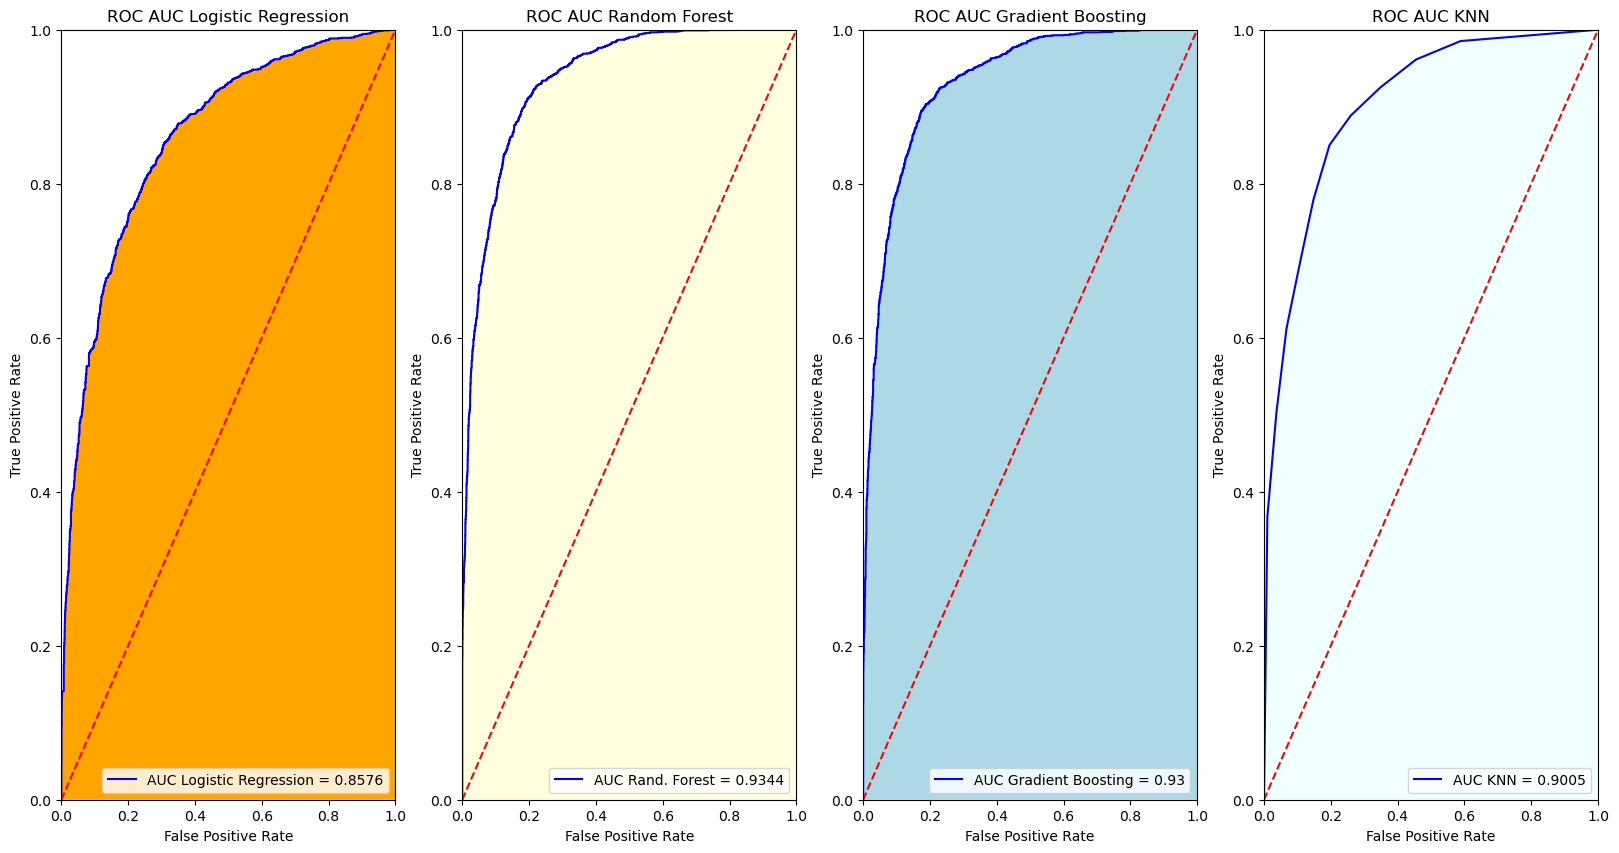

In [142]:
plt.figure(figsize = (25, 10))
lr_curve()
rf_curve()
gb_curve()
knn_curve()

###################################################
Model DecisionTreeClassifier
Accuracy: 0.8198653198653199
Precision: 0.8315881326352531
Recall: 0.8021885521885522
F1 Score: 0.8166238217652101


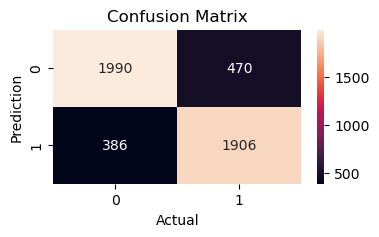

In [143]:
cal_model(X_train , X_test, y_train, y_test,dc)

###################################################
Model RandomForestClassifier
Accuracy: 0.8503787878787878
Precision: 0.8523063901819721
Recall: 0.8476430976430976
F1 Score: 0.8499683477526905


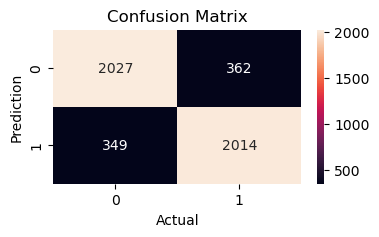

In [144]:
cal_model(X_train , X_test, y_train, y_test,rf)

###################################################
Model KNeighborsClassifier
Accuracy: 0.8200757575757576
Precision: 0.8245838668373879
Recall: 0.8131313131313131
F1 Score: 0.8188175460902734


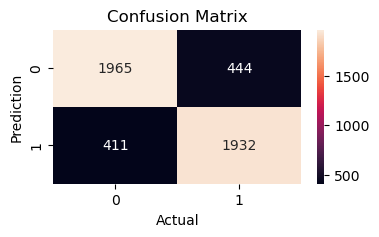

In [145]:
cal_model(X_train , X_test, y_train, y_test,knn)

###################################################
Model SVC
Accuracy: 0.8026094276094277
Precision: 0.7915652879156528
Recall: 0.8215488215488216
F1 Score: 0.8062783973564643


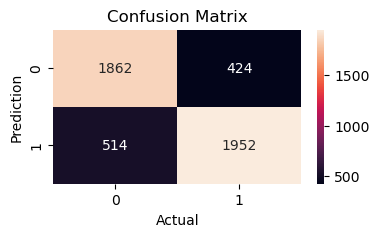

In [146]:
cal_model(X_train , X_test, y_train, y_test,svm)

###################################################
Model LogisticRegression
Accuracy: 0.7758838383838383
Precision: 0.7698641416220667
Recall: 0.7870370370370371
F1 Score: 0.7783558792924038


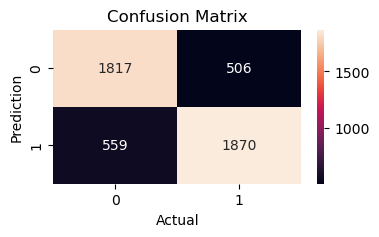

In [147]:
cal_model(X_train , X_test, y_train, y_test,lr)